In [2]:
import talib

In [3]:
from pandas_datareader import wb
import pandas_datareader.data as web
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)
from pandas_datareader import data as pdr

import altair as alt

%matplotlib inline

In [4]:
# read in stock price data for tesla for the last 5 years
start = datetime(2022,1,1)
end = datetime(2022,12,31)
df = web.DataReader("2409.TW",start,end)
# display header of stock price data frame
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03 00:00:00+08:00,28.9375,29.0000,28.1875,28.2500,23.502401,58673491
2022-01-04 00:00:00+08:00,28.4375,29.0625,28.3750,28.6875,23.866377,68932685
2022-01-05 00:00:00+08:00,28.8125,28.8125,28.3750,28.5000,23.710386,38954664
2022-01-06 00:00:00+08:00,28.3750,28.3750,27.8750,28.0000,23.294416,54372721
2022-01-07 00:00:00+08:00,28.2500,28.3125,27.3125,27.3125,22.722454,79856828


In [5]:
# 取開盤價、收盤價
close = df['Close']
Open = df['Open']
Open2022 = Open['2022']

In [6]:
power = yf.Ticker("POWERGRID.NS")
df = power.history(start="2020-01-01", end='2020-09-04')
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-01 00:00:00+05:30,117.491124,120.789874,117.306142,120.543236,10215280,0.0,0.0
2020-01-02 00:00:00+05:30,120.574060,121.283141,119.834158,120.296600,4255269,0.0,0.0
2020-01-03 00:00:00+05:30,119.772499,120.111628,117.922731,119.001762,5518701,0.0,0.0
2020-01-06 00:00:00+05:30,118.385188,119.587545,115.918830,119.063446,5516467,0.0,0.0
2020-01-07 00:00:00+05:30,119.094245,119.926638,117.861066,118.200195,10517784,0.0,0.0


In [7]:
close = np.array(close, dtype=float)
data = talib.RSI(close, timeperiod=15)[-1]

In [8]:
talib.SMA(close,20)

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan, 27.221875  ,
       27.165625  , 27.1       , 27.025     , 26.934375  , 26.84375   ,
       26.715625  , 26.575     , 26.434375  , 26.353125  , 26.265625  ,
       26.190625  , 26.096875  , 26.021875  , 25.934375  , 25.928125  ,
       25.978125  , 26.078125  , 26.1125    , 26.134375  , 26.15625   ,
       26.128125  , 26.103125  , 26.146875  , 26.221875  , 26.26875   ,
       26.31875   , 26.346875  , 26.390625  , 26.39375   , 26.4375    ,
       26.459375  , 26.478125  , 26.471875  , 26.415625  , 26.353125  ,
       26.275     , 26.18125   , 26.14375   , 26.0375    , 25.953125  ,
       25.8125    , 25.659375  , 25.4875    , 25.31875   , 25.1875    ,
       25.009375  , 24.853125  , 24.7125    , 24.55      , 24.37

In [9]:
ma5 = talib.SMA(close, timeperiod=5)
ma10 = talib.SMA(close, timeperiod=10)
ma5

array([        nan,         nan,         nan,         nan, 28.15      ,
       28.125     , 28.1       , 28.0625    , 28.0625    , 28.1       ,
       27.95      , 27.7       , 27.475     , 27.4625    , 27.2375    ,
       26.8375    , 26.275     , 25.875     , 25.5       , 25.4       ,
       25.75      , 26.325     , 26.6875    , 26.7125    , 26.6375    ,
       26.325     , 26.        , 25.7       , 25.7375    , 25.7875    ,
       25.85      , 25.7875    , 25.825     , 25.7875    , 25.8875    ,
       25.9875    , 26.2       , 26.2375    , 26.3       , 26.3125    ,
       26.35      , 26.425     , 26.825     , 27.0625    , 27.0875    ,
       27.0875    , 26.975     , 26.675     , 26.425     , 26.4625    ,
       26.4125    , 26.3125    , 26.15      , 25.875     , 25.55      ,
       25.25      , 25.0125    , 24.925     , 24.7875    , 24.7125    ,
       24.5       , 24.3375    , 24.2       , 24.1875    , 24.025     ,
       23.875     , 23.75      , 23.575     , 23.35      , 23.2 

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 [Text(-50.0, 0, '−50'),
  Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250'),
  Text(300.0, 0, '300')])

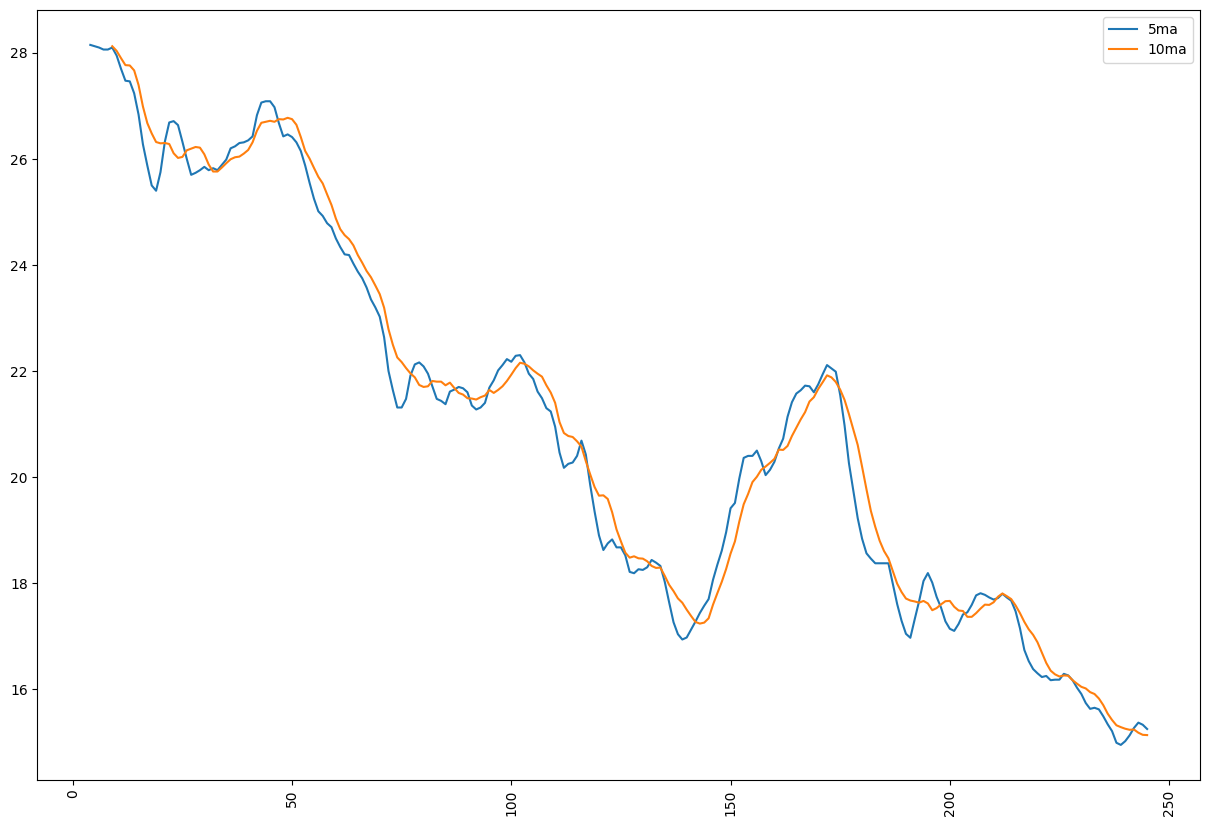

In [10]:
plt.figure(figsize=(15,10))
plt.plot(ma5)
plt.plot(ma10)
plt.legend(['5ma','10ma'])
plt.xticks(rotation='vertical')

In [11]:
# 5ma與10ma差距
MA_dif = ma5 - ma10
MA_dif = MA_dif

# 參數
stock = 0
sig = [] 

# 訊號
for i in range(len(MA_dif)):
    # 5MA往上穿越10MA
    if MA_dif[i-1] < 0 and MA_dif[i] > 0 and stock == 0:
        stock += 1
        sig.append(1)
    
    # 5MA往下穿越10MA
    elif MA_dif[i-1] > 0 and MA_dif[i] < 0 and stock == 1:
        stock -= 1
        sig.append(-1)
    else:
        sig.append(0)



In [12]:
MA_dif = MA_dif.tolist()

In [13]:
# 製作dataframe
ma_sig = pd.Series(MA_dif.index)
ma_sig_2022 = ma_sig['2022']

KeyError: '2022'

In [ ]:
MA_dif

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 -0.02499999999999858,
 -0.08750000000000213,
 -0.1999999999999993,
 -0.2937499999999993,
 -0.3000000000000007,
 -0.4312499999999986,
 -0.5562500000000021,
 -0.7125000000000021,
 -0.8000000000000007,
 -0.9812499999999993,
 -0.9187500000000028,
 -0.5437499999999993,
 0.02499999999999858,
 0.40625,
 0.6062499999999993,
 0.6187499999999986,
 0.28749999999999787,
 -0.16250000000000142,
 -0.49375000000000213,
 -0.4875000000000007,
 -0.42499999999999716,
 -0.23749999999999716,
 -0.10624999999999929,
 0.0625,
 0.02500000000000213,
 0.05000000000000071,
 0.06875000000000142,
 0.2062500000000007,
 0.2062500000000007,
 0.2562500000000014,
 0.21249999999999858,
 0.18125000000000213,
 0.11250000000000071,
 0.2937499999999993,
 0.3812500000000014,
 0.3874999999999993,
 0.3687499999999986,
 0.27500000000000213,
 -0.07499999999999929,
 -0.31874999999999787,
 -0.3125,
 -0.3374999999999986,
 -0.3312500000000007,
 -0.26250000000000284,
 -0.2749999999